In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('CHURN@.csv')

In [96]:
df.shape

(7043, 21)

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [100]:
print('Number of Categorical Columns is',(df.dtypes=='object').sum())
print('Number of Numerical Columns is',(df.dtypes!='object').sum())

Number of Categorical Columns is 18
Number of Numerical Columns is 3


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [101]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [102]:
df.mean()

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [103]:
# Here we saw that 'TotalCharges' column is a categorical variable. But acctually it is a numerical variable seeing the data points. 
# So we need to convert it to numerical variable from categorical variable.


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [104]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# IMPUTATION OF MISSING VALUES

In [105]:
df1=df.fillna(df['TotalCharges'].median())

In [106]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [107]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [108]:
for i in df1.columns:
    print('The number of unique values for', i ,'is',len(df1[str(i)].unique()))
#len(df2['customerID'].unique())

The number of unique values for customerID is 7043
The number of unique values for gender is 2
The number of unique values for SeniorCitizen is 2
The number of unique values for Partner is 2
The number of unique values for Dependents is 2
The number of unique values for tenure is 73
The number of unique values for PhoneService is 2
The number of unique values for MultipleLines is 3
The number of unique values for InternetService is 3
The number of unique values for OnlineSecurity is 3
The number of unique values for OnlineBackup is 3
The number of unique values for DeviceProtection is 3
The number of unique values for TechSupport is 3
The number of unique values for StreamingTV is 3
The number of unique values for StreamingMovies is 3
The number of unique values for Contract is 3
The number of unique values for PaperlessBilling is 2
The number of unique values for PaymentMethod is 4
The number of unique values for MonthlyCharges is 1585
The number of unique values for TotalCharges is 6

In [109]:
print(df1['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


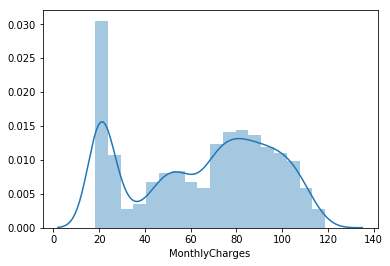

In [110]:
import seaborn as sns
sns.distplot(df1['MonthlyCharges']) 
plt.show()

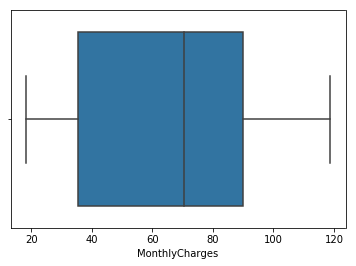

In [111]:
sns.boxplot(df1['MonthlyCharges']);

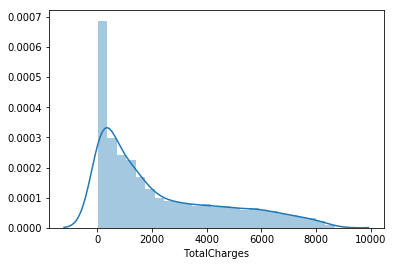

In [112]:
sns.distplot(df1['TotalCharges']) 
plt.show()

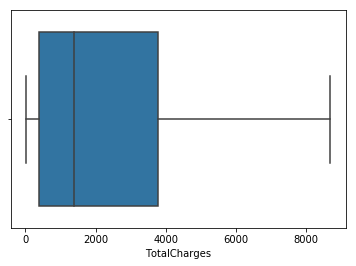

In [21]:
sns.boxplot(df1['TotalCharges']);

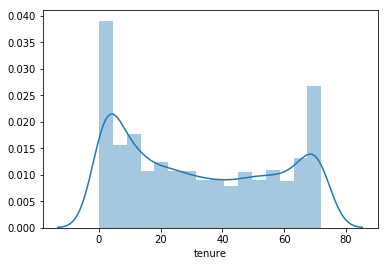

In [22]:
sns.distplot(df1['tenure']) 
plt.show()

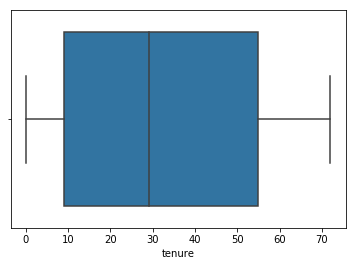

In [23]:
sns.boxplot(df1['tenure']);

In [113]:
# Calculating the skewness of all columns
df1.skew(axis = 0, skipna = True) 

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [114]:
# here we found that the skewness of 'TotalCharges' is high with compare to other variables. so we need to reduce this one.
# We now use log transformation to remove the skewness to some extent

df1['TotalCharges'] = df1['TotalCharges'].apply(np.log)

In [115]:
import scipy
scipy.stats.skew(df1['TotalCharges'])
#skewness reduced from 0.9 to 0.75

-0.7548382555166789

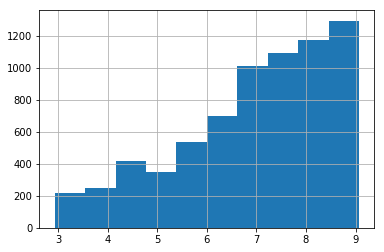

In [116]:
df1['TotalCharges'].hist();

In [28]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.100654
tenure,0.016567,1.000000,0.247900,0.831529
MonthlyCharges,0.220173,0.247900,1.000000,0.573579
TotalCharges,0.100654,0.831529,0.573579,1.000000


In [29]:
crosstab = pd.crosstab(df1['SeniorCitizen'], df1['Churn'])
print(crosstab)

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


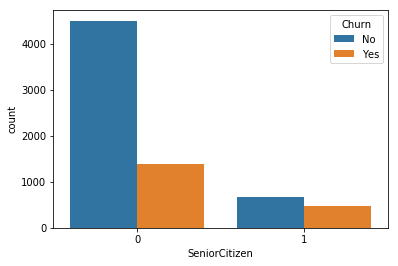

In [30]:
sns.countplot(df1['SeniorCitizen'],hue=df1['Churn'])
plt.xticks(rotation=0);

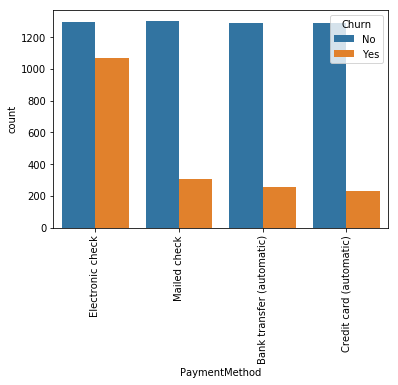

In [31]:
sns.countplot(df1['PaymentMethod'],hue=df1['Churn'])
plt.xticks(rotation=90);

In [32]:
df1 = df1.replace('Mailed check','NoElecCheck')
df1 = df1.replace('Bank transfer (automatic)','NoElecCheck')
df1 = df1.replace('Credit card (automatic)','NoElecCheck')

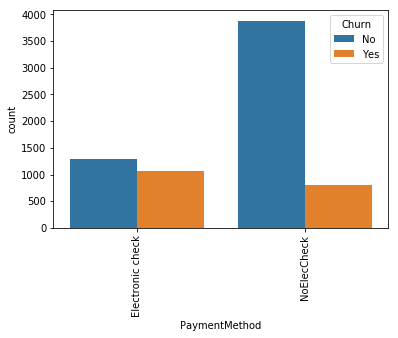

In [33]:
sns.countplot(df1['PaymentMethod'],hue=df1['Churn'])
plt.xticks(rotation=90);

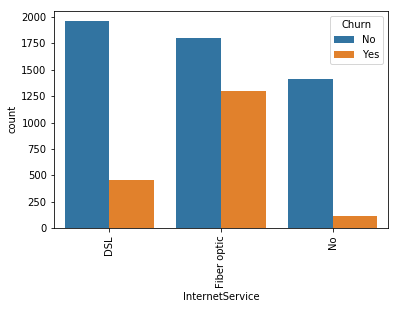

In [34]:
sns.countplot(df1['InternetService'],hue=df1['Churn'])
plt.xticks(rotation=90);

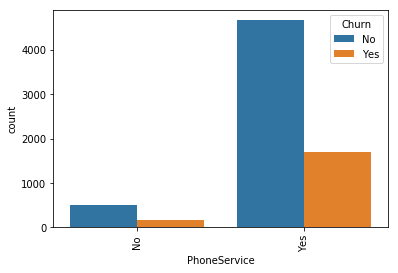

In [35]:
sns.countplot(df1['PhoneService'],hue=df1['Churn'])
plt.xticks(rotation=90);  

In [36]:
df1.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

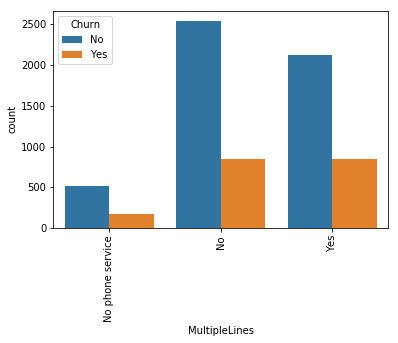

In [37]:
sns.countplot(df1['MultipleLines'],hue=df1['Churn'])
plt.xticks(rotation=90);  
plt.show()

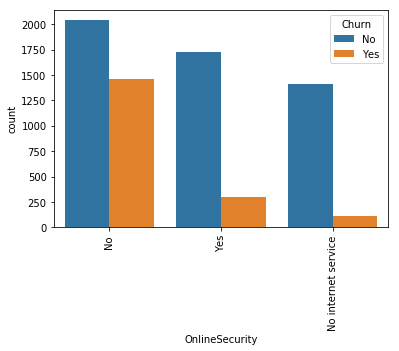

In [38]:
sns.countplot(df1['OnlineSecurity'],hue=df1['Churn'])
plt.xticks(rotation=90);  
plt.show()

In [39]:
for i in df1.columns[:-3]:
    print('the p value for churn column with',i,'is',scipy.stats.chi2_contingency(pd.crosstab(df1[str(i)], df1['Churn']))[1])

the p value for churn column with customerID is 0.49439767459438705
the p value for churn column with gender is 0.48657873605618596
the p value for churn column with SeniorCitizen is 1.510066805092378e-36
the p value for churn column with Partner is 2.1399113440759935e-36
the p value for churn column with Dependents is 4.9249216612154196e-43
the p value for churn column with tenure is 1.2807811055496877e-176
the p value for churn column with PhoneService is 0.3387825358066928
the p value for churn column with MultipleLines is 0.0034643829548773
the p value for churn column with InternetService is 9.571788222840544e-160
the p value for churn column with OnlineSecurity is 2.661149635176552e-185
the p value for churn column with OnlineBackup is 2.0797592160864276e-131
the p value for churn column with DeviceProtection is 5.505219496457244e-122
the p value for churn column with TechSupport is 1.4430840279998987e-180
the p value for churn column with StreamingTV is 5.528994485739183e-82
the

In [40]:
df3=df1.drop(['customerID'], axis=1)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [42]:
for i in df3.columns[:-3]:
    print('the p value for churn column with',i,'is',scipy.stats.chi2_contingency(pd.crosstab(df3[str(i)], df3['Churn']))[1])

the p value for churn column with gender is 0.48657873605618596
the p value for churn column with SeniorCitizen is 1.510066805092378e-36
the p value for churn column with Partner is 2.1399113440759935e-36
the p value for churn column with Dependents is 4.9249216612154196e-43
the p value for churn column with tenure is 1.2807811055496877e-176
the p value for churn column with PhoneService is 0.3387825358066928
the p value for churn column with MultipleLines is 0.0034643829548773
the p value for churn column with InternetService is 9.571788222840544e-160
the p value for churn column with OnlineSecurity is 2.661149635176552e-185
the p value for churn column with OnlineBackup is 2.0797592160864276e-131
the p value for churn column with DeviceProtection is 5.505219496457244e-122
the p value for churn column with TechSupport is 1.4430840279998987e-180
the p value for churn column with StreamingTV is 5.528994485739183e-82
the p value for churn column with StreamingMovies is 2.667756755723681e

In [43]:
df4=df3.drop(['PhoneService'], axis=1)

In [44]:
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.396185,No
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,NoElecCheck,56.95,7.544068,No
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,NoElecCheck,53.85,4.683519,Yes
3,Male,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,NoElecCheck,42.30,7.517928,No
4,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.021575,Yes


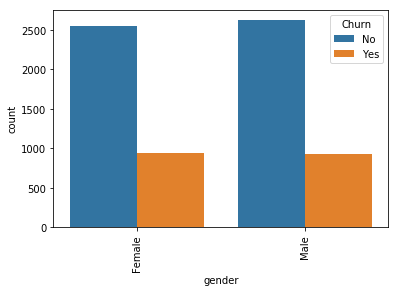

In [45]:
sns.countplot(df4['gender'],hue=df4['Churn'])
plt.xticks(rotation=90);  
plt.show()

In [46]:
df5=df4.drop(['gender'], axis=1)

In [47]:
categorical_columns=[i for i in df5.columns if df5[i].dtype in [np.object]]

In [48]:
df5[categorical_columns]

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,NoElecCheck,No
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,NoElecCheck,Yes
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,NoElecCheck,No
4,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,NoElecCheck,No
7,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,NoElecCheck,No
8,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,No,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,NoElecCheck,No


In [49]:
from sklearn.preprocessing import LabelEncoder
df5[categorical_columns] = df5[categorical_columns].apply(LabelEncoder().fit_transform)

In [50]:
df5.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0,29.85,3.396185,0
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,1,56.95,7.544068,0
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,1,53.85,4.683519,1
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,1,42.30,7.517928,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,70.70,5.021575,1


In [51]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#ohe.fit_transform(df5[categorical_columns])

In [52]:
df5.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0,29.85,3.396185,0
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,1,56.95,7.544068,0
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,1,53.85,4.683519,1
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,1,42.30,7.517928,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,70.70,5.021575,1


In [53]:
df7=pd.get_dummies(data=df5,columns=['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],drop_first=True)

In [54]:
df7.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_1,Dependents_1,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,...,TechSupport_2,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,Churn_1
0,0,1,29.85,3.396185,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,34,56.95,7.544068,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,2,53.85,4.683519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,45,42.30,7.517928,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,2,70.70,5.021575,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [55]:
from sklearn.model_selection import train_test_split
X=df7.drop(['Churn_1'],axis=1)
y=df7['Churn_1']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0) 

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc_X=StandardScaler()

In [58]:
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

# RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
#rf=RandomForestClassifier()
#rf.fit(X_train,y_train)

In [61]:
from sklearn.model_selection import cross_val_score,GridSearchCV
#for using k fold cross validation to find the performance measure of a model
#for classification by default measure of performance is accuracy
from sklearn.metrics import cohen_kappa_score,make_scorer
#cohen kappa score is used along with accuracy score to find te performance measure of a classifcation model

In [62]:
tree = RandomForestClassifier()

In [63]:
cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.81230441, 0.79285973, 0.77383515, 0.7937046 , 0.81222155])

In [64]:
cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.8021984670068341

In [65]:
#param_tree={'criterion':['gini','entropy'],'max_depth':[3,5,7,9],'n_estimators':[320,330,340]}

In [66]:
param_tree={'criterion':['gini','entropy'],'max_depth':[3,5,7,9],'n_estimators':[50,100,150,200,250]}

In [67]:
best_tree=GridSearchCV(estimator=tree, param_grid=param_tree, scoring='roc_auc', cv=5, n_jobs=-1)

In [68]:
best_tree.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9], 'n_estimators': [50, 100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [69]:
best_tree.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 250}

In [70]:
cross_val_score(estimator=best_tree.best_estimator_, X=X_train, y=y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.8497081846811941

In [71]:
#cross_val_score(estimator=best_tree.best_estimator_, X=X_test, y=y_test, cv=5, scoring='roc_auc', n_jobs=-1).mean()

In [72]:
predictions = best_tree.predict(X_test)

In [84]:
accuracy_score(predictions,y_test)

0.7863733144073811

In [ ]:
#pred_model=rf.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score

In [ ]:
#accuracy_score(pred_model,y_test)

# LOGITIC REGRESSION

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\User PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
cross_val_score(estimator=logreg, X=X_train, y=y_train, cv=5).mean()

0.8116758899194598

In [88]:
y_pred=logreg.predict(X_test)

In [89]:
accuracy_score(y_pred,y_test)

0.7970191625266146

In [90]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[930, 111],
       [175, 193]], dtype=int64)

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7970191625266146
Precision: 0.6348684210526315
Recall: 0.5244565217391305


In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.7863733144073811
Precision: 0.6245353159851301
Recall: 0.45652173913043476


In [75]:
from sklearn.svm import SVC
clf =SVC(kernel='linear',probability = True)


In [80]:
from sklearn.metrics import accuracy_score

In [81]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
y_svc=clf.predict(X_test)

In [83]:
accuracy_score(y_svc,y_test)

0.7991483321504613

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_svc))
print("Precision:",metrics.precision_score(y_test, y_svc))
print("Recall:",metrics.recall_score(y_test, y_svc))

Accuracy: 0.7991483321504613
Precision: 0.6501766784452296
Recall: 0.5
